In [2]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357295 sha256=222288e4482e0e9193df447a101b370cb3f88b35fb4b36a8b008265f51890f8e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from surprise import SVD, KNNBasic, Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy

**Part a. Read data from “ratings small.csv”**

In [6]:
ratings = pd.read_csv('/content/ratings_small.csv')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings.shape

(100004, 4)

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [7]:
reader = Reader(rating_scale=(0.5, 5.0))

In [8]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [9]:
PMF = SVD(biased=False)  # Probabilistic Matrix Factorization
UBCF = KNNBasic(sim_options={'user_based': True}) # User based Collaborative Filtering
IBCF = KNNBasic(sim_options={'user_based': False}) # Item based Collaborative Filtering

**Part c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation (10 points)**

In [ ]:
PMF_cv = cross_validate(PMF, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7867  0.7762  0.7783  0.7845  0.7790  0.7809  0.0040  
RMSE (testset)    1.0218  1.0122  1.0117  1.0164  1.0140  1.0152  0.0037  
Fit time          2.09    1.74    1.52    1.52    1.53    1.68    0.22    
Test time         0.41    0.11    0.14    0.27    0.10    0.21    0.12    


Average MAE for Probabilistic Matrix Factorization under 5-folds cross-validation is 0.7809

Average RMSE for Probabilistic Matrix Factorization under 5-folds cross-validation is 1.0152

In [ ]:
UBCF_cv = cross_validate(UBCF, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7400  0.7406  0.7461  0.7502  0.7455  0.7445  0.0038  
RMSE (testset)    0.9623  0.9623  0.9737  0.9755  0.9712  0.9690  0.0056  
Fit time          0.13    0.16    0.16    0.15    0.19    0.16    0.02    
Test time         1.40    1.63    1.78    2.42    2.36    1.92    0.40    


Average MAE for User-based Collaborative Filtering under 5-folds cross=validation is 0.7445

Average RMSE for User-based Collaborative Filtering under 5-folds cross-validation is 0.9690

In [ ]:
IBCF_cv = cross_validate(IBCF, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7204  0.7229  0.7226  0.7206  0.7212  0.7215  0.0010  
RMSE (testset)    0.9324  0.9376  0.9372  0.9372  0.9343  0.9357  0.0021  
Fit time          3.82    3.98    3.95    4.02    3.94    3.94    0.07    
Test time         8.01    7.96    8.42    11.29   8.22    8.78    1.26    


Average MAE for Item-based Collaborative Filtering under 5-folds cross=validation is 0.7215

Average RMSE for Item-based Collaborative Filtering under 5-folds cross-validation is 0.9357

**Part d. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE.  Which ML model is the best in the movie rating data? (10 points)**

Average MAE : PMF =  0.7809

Average MAE : UBCF =  0.7445

Average MAE : IBCF =  0.7215

<br>


Average RMSE : PMF =  1.0152

Average RMSE : UBCF =  0.9690

Average RMSE : IBCF =  0.9357

<br>

Item-based Collaborative Filtering (IBCF) has the lowest Average MAE and the lowest RMSE compared to those of PMF and UBCF. Lower MAE and lower RMSE indicate a better model.

Therefore, **IBCF is the best model for movie rating data**.

**Part e. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering? (10 points)**

In [ ]:
# Impact of Cosine, MSD and Pearson similarities on UBCF

UBCF_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
UBCF_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': True})
UBCF_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})

In [ ]:
UBCF_cosine_cv = cross_validate(UBCF_cosine, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7644  0.7725  0.7689  0.7701  0.7645  0.7681  0.0032  
RMSE (testset)    0.9897  0.9965  0.9940  1.0029  0.9892  0.9944  0.0050  
Fit time          0.22    0.23    0.21    0.23    0.67    0.31    0.18    
Test time         1.46    1.48    1.42    1.57    4.02    1.99    1.02    


In [ ]:
UBCF_msd_cv = cross_validate(UBCF_msd, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7449  0.7476  0.7476  0.7385  0.7456  0.7448  0.0034  
RMSE (testset)    0.9702  0.9726  0.9694  0.9627  0.9711  0.9692  0.0034  
Fit time          0.13    0.16    0.15    0.15    0.21    0.16    0.03    
Test time         1.46    1.45    1.66    2.39    1.50    1.69    0.35    


In [ ]:
UBCF_pearson_cv = cross_validate(UBCF_pearson, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7750  0.7665  0.7734  0.7766  0.7718  0.7726  0.0035  
RMSE (testset)    1.0030  0.9920  1.0015  0.9999  0.9995  0.9992  0.0038  
Fit time          0.62    0.54    0.26    0.26    0.28    0.39    0.16    
Test time         3.01    1.86    1.46    1.42    1.43    1.84    0.61    


In [ ]:
# Impact of Cosine, MSD and Pearson similarities on IBCF

IBCF_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
IBCF_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': False})
IBCF_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})

In [ ]:
IBCF_cosine_cv = cross_validate(IBCF_cosine, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7774  0.7681  0.7766  0.7726  0.7747  0.7739  0.0034  
RMSE (testset)    0.9999  0.9843  1.0004  0.9937  0.9933  0.9943  0.0058  
Fit time          8.89    8.11    6.96    8.07    6.20    7.64    0.95    
Test time         8.99    10.21   6.99    8.46    8.44    8.62    1.04    


In [ ]:
IBCF_msd_cv = cross_validate(IBCF_msd, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7181  0.7281  0.7201  0.7186  0.7189  0.7208  0.0037  
RMSE (testset)    0.9300  0.9398  0.9383  0.9351  0.9305  0.9347  0.0040  
Fit time          4.05    4.00    4.06    4.05    4.00    4.03    0.03    
Test time         8.36    8.19    8.20    8.70    8.91    8.47    0.28    


In [ ]:
IBCF_pearson_cv = cross_validate(IBCF_pearson, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7655  0.7680  0.7721  0.7636  0.7706  0.7680  0.0031  
RMSE (testset)    0.9876  0.9899  0.9916  0.9850  0.9938  0.9896  0.0030  
Fit time          8.61    9.38    8.63    7.88    8.65    8.63    0.48    
Test time         7.66    7.18    8.42    8.29    6.89    7.69    0.60    


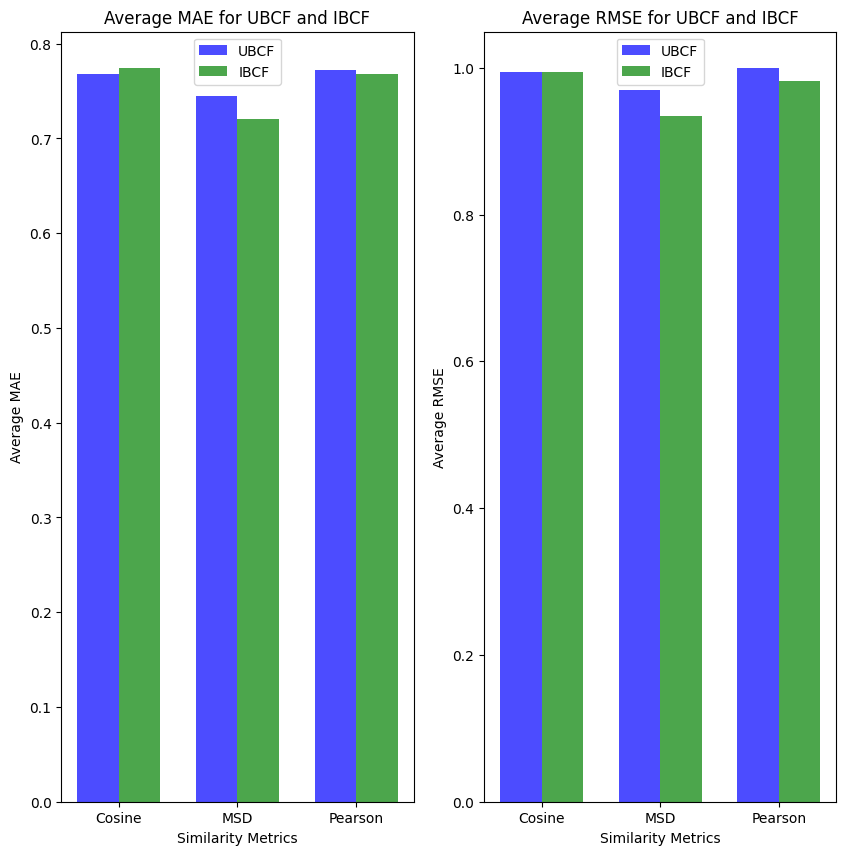

In [ ]:
similarity_metrics = ['Cosine', 'MSD', 'Pearson']
ubcf_mae = [0.7681, 0.7448, 0.7726]  # MAE for UBCF
ubcf_rmse = [0.9944, 0.9692, 0.9992]  # RMSE for UBCF
ibcf_mae = [0.7739, 0.7208, 0.7680]  # MAE for IBCF
ibcf_rmse = [0.9943, 0.9347, 0.9826]  # RMSE for IBCF

plt.figure(figsize=(10, 10))

# Subplot for MAE
plt.subplot(1, 2, 1)
bar_width = 0.35
index = np.arange(len(similarity_metrics))

plt.bar(index, ubcf_mae, bar_width, label='UBCF', color='b', alpha=0.7)
plt.bar(index + bar_width, ibcf_mae, bar_width, label='IBCF', color='g', alpha=0.7)

plt.xlabel('Similarity Metrics')
plt.ylabel('Average MAE')
plt.title('Average MAE for UBCF and IBCF')
plt.xticks(index + bar_width / 2, similarity_metrics)
plt.legend()

# Subplot for RMSE
plt.subplot(1, 2, 2)
plt.bar(index, ubcf_rmse, bar_width, label='UBCF', color='b', alpha=0.7)
plt.bar(index + bar_width, ibcf_rmse, bar_width, label='IBCF', color='g', alpha=0.7)

plt.xlabel('Similarity Metrics')
plt.ylabel('Average RMSE')
plt.title('Average RMSE for UBCF and IBCF')
plt.xticks(index + bar_width / 2, similarity_metrics)
plt.legend()

plt.show()

The impact of the three metrics (Cosine, MSD, Pearson) on User-based Collaborative Filtering (UBCF) is **not consistent** with their impact on Item-based Collaborative Filtering (IBCF).

**In both UBCF and IBCF, MSD performs the best**. In UBCF, Consine performs better than Pearson. Whereas in IBCF, Pearson performs better than Cosine. Hence, the impact of the three metrics is not consistent.

**Part f. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results. (10 points)**

In [21]:
# Impact of neighbors on UBCF

UBCF_5 = KNNBasic(k=5, sim_options={'user_based': True})
UBCF_10 = KNNBasic(k=10, sim_options={'user_based': True})
UBCF_15 = KNNBasic(k=15, sim_options={'user_based': True})
UBCF_20 = KNNBasic(k=20, sim_options={'user_based': True})
UBCF_30 = KNNBasic(k=30, sim_options={'user_based': True})
UBCF_40 = KNNBasic(k=40, sim_options={'user_based': True})
UBCF_50 = KNNBasic(k=50, sim_options={'user_based': True})
UBCF_60 = KNNBasic(k=60, sim_options={'user_based': True})
UBCF_70 = KNNBasic(k=70, sim_options={'user_based': True})
UBCF_80 = KNNBasic(k=80, sim_options={'user_based': True})
UBCF_90 = KNNBasic(k=90, sim_options={'user_based': True})

In [ ]:
UBCF_5_cv = cross_validate(UBCF_5, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9858  0.9829  0.9937  0.9899  0.9899  0.9884  0.0037  
MAE (testset)     0.7512  0.7488  0.7619  0.7551  0.7604  0.7555  0.0050  
Fit time          0.20    0.17    0.16    0.16    0.16    0.17    0.02    
Test time         1.06    1.42    1.46    1.02    1.42    1.28    0.20    


In [ ]:
UBCF_10_cv = cross_validate(UBCF_10, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9661  0.9671  0.9716  0.9647  0.9648  0.9668  0.0025  
MAE (testset)     0.7367  0.7382  0.7433  0.7374  0.7384  0.7388  0.0023  
Fit time          0.21    0.15    0.15    0.15    0.14    0.16    0.03    
Test time         1.30    1.13    1.14    1.31    1.31    1.24    0.08    


In [ ]:
UBCF_15_cv = cross_validate(UBCF_15, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9643  0.9553  0.9638  0.9649  0.9628  0.9622  0.0035  
MAE (testset)     0.7379  0.7317  0.7374  0.7373  0.7362  0.7361  0.0023  
Fit time          0.22    0.19    0.19    0.15    0.15    0.18    0.03    
Test time         1.47    2.00    1.51    1.59    1.52    1.62    0.19    


In [ ]:
UBCF_20_cv = cross_validate(UBCF_20, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9661  0.9552  0.9710  0.9546  0.9596  0.9613  0.0064  
MAE (testset)     0.7404  0.7334  0.7448  0.7325  0.7338  0.7370  0.0048  
Fit time          0.20    0.22    0.29    0.16    0.14    0.20    0.05    
Test time         1.44    2.88    1.45    1.58    1.27    1.73    0.58    


In [ ]:
UBCF_30_cv = cross_validate(UBCF_30, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9622  0.9612  0.9670  0.9647  0.9780  0.9666  0.0060  
MAE (testset)     0.7382  0.7378  0.7421  0.7425  0.7472  0.7416  0.0034  
Fit time          0.18    0.21    0.19    0.15    0.14    0.18    0.03    
Test time         1.73    2.28    1.35    1.33    1.93    1.72    0.36    


In [ ]:
UBCF_40_cv = cross_validate(UBCF_40, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9582  0.9707  0.9703  0.9715  0.9687  0.9679  0.0049  
MAE (testset)     0.7352  0.7444  0.7458  0.7436  0.7476  0.7433  0.0043  
Fit time          0.12    0.21    0.15    0.16    0.14    0.15    0.03    
Test time         2.05    1.91    2.05    1.44    1.60    1.81    0.25    


In [ ]:
UBCF_50_cv = cross_validate(UBCF_50, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9669  0.9792  0.9605  0.9737  0.9677  0.9696  0.0064  
MAE (testset)     0.7454  0.7526  0.7393  0.7503  0.7418  0.7459  0.0050  
Fit time          0.21    0.16    0.15    0.15    0.15    0.16    0.03    
Test time         1.53    2.90    1.47    1.46    1.69    1.81    0.55    


In [22]:
UBCF_60_cv = cross_validate(UBCF_60, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9683  0.9663  0.9755  0.9798  0.9776  0.9735  0.0053  
MAE (testset)     0.7461  0.7416  0.7501  0.7522  0.7551  0.7490  0.0047  
Fit time          0.22    0.19    0.27    0.17    0.17    0.20    0.04    
Test time         1.83    2.46    2.00    1.76    1.63    1.94    0.29    


In [26]:
UBCF_70_cv = cross_validate(UBCF_70, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9732  0.9780  0.9699  0.9654  0.9827  0.9739  0.0060  
MAE (testset)     0.7480  0.7521  0.7474  0.7444  0.7565  0.7497  0.0042  
Fit time          0.17    0.17    0.17    0.22    0.18    0.18    0.02    
Test time         1.85    1.61    1.73    2.36    1.59    1.83    0.28    


In [24]:
UBCF_80_cv = cross_validate(UBCF_80, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9762  0.9868  0.9757  0.9698  0.9662  0.9749  0.0070  
MAE (testset)     0.7529  0.7601  0.7498  0.7472  0.7437  0.7508  0.0056  
Fit time          0.14    0.18    0.19    0.25    0.17    0.19    0.04    
Test time         1.64    1.65    2.30    1.94    1.65    1.83    0.26    


In [4]:
# Impact of neighbors on IBCF

IBCF_5 = KNNBasic(k=5, sim_options={'user_based': False})
IBCF_10 = KNNBasic(k=10, sim_options={'user_based': False})
IBCF_15 = KNNBasic(k=15, sim_options={'user_based': False})
IBCF_20 = KNNBasic(k=20, sim_options={'user_based': False})
IBCF_30 = KNNBasic(k=30, sim_options={'user_based': False})
IBCF_40 = KNNBasic(k=40, sim_options={'user_based': False})
IBCF_50 = KNNBasic(k=50, sim_options={'user_based': False})
IBCF_60 = KNNBasic(k=60, sim_options={'user_based': False})
IBCF_70 = KNNBasic(k=70, sim_options={'user_based': False})
IBCF_80 = KNNBasic(k=80, sim_options={'user_based': False})

In [ ]:
IBCF_5_cv = cross_validate(IBCF_5, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0286  1.0220  1.0257  1.0193  1.0142  1.0220  0.0050  
MAE (testset)     0.7954  0.7909  0.7934  0.7856  0.7846  0.7900  0.0042  
Fit time          6.73    5.68    6.62    5.75    4.89    5.93    0.68    
Test time         6.24    6.39    8.35    6.64    5.63    6.65    0.91    


In [ ]:
IBCF_10_cv = cross_validate(IBCF_10, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9850  0.9798  0.9693  0.9684  0.9773  0.9760  0.0063  
MAE (testset)     0.7611  0.7550  0.7498  0.7500  0.7571  0.7546  0.0043  
Fit time          4.64    4.09    4.02    3.95    4.42    4.22    0.26    
Test time         5.59    6.80    6.77    6.86    7.61    6.73    0.65    


In [ ]:
IBCF_15_cv = cross_validate(IBCF_15, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9536  0.9643  0.9524  0.9569  0.9586  0.9572  0.0042  
MAE (testset)     0.7346  0.7442  0.7376  0.7396  0.7401  0.7392  0.0031  
Fit time          4.17    4.44    4.69    4.20    3.94    4.29    0.26    
Test time         5.85    6.36    6.07    7.03    7.28    6.52    0.55    


In [ ]:
IBCF_20_cv = cross_validate(IBCF_20, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9500  0.9437  0.9497  0.9388  0.9524  0.9469  0.0050  
MAE (testset)     0.7328  0.7295  0.7321  0.7271  0.7348  0.7312  0.0027  
Fit time          3.92    4.15    3.93    4.09    4.27    4.07    0.13    
Test time         7.09    7.40    7.39    6.65    6.17    6.94    0.47    


In [ ]:
IBCF_30_cv = cross_validate(IBCF_30, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9409  0.9378  0.9386  0.9384  0.9386  0.9389  0.0011  
MAE (testset)     0.7268  0.7222  0.7259  0.7236  0.7253  0.7248  0.0017  
Fit time          4.58    4.74    11.60   5.32    4.68    6.18    2.72    
Test time         6.81    6.68    6.69    6.57    7.26    6.80    0.24    


In [ ]:
IBCF_40_cv = cross_validate(IBCF_40, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9334  0.9422  0.9393  0.9248  0.9310  0.9341  0.0061  
MAE (testset)     0.7212  0.7254  0.7262  0.7131  0.7160  0.7204  0.0051  
Fit time          4.24    4.15    4.14    4.08    4.11    4.14    0.05    
Test time         7.56    8.14    8.06    8.02    8.15    7.99    0.22    


In [ ]:
IBCF_50_cv = cross_validate(IBCF_50, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9211  0.9277  0.9359  0.9431  0.9364  0.9328  0.0076  
MAE (testset)     0.7127  0.7158  0.7198  0.7256  0.7229  0.7193  0.0047  
Fit time          4.04    4.48    4.09    4.17    4.05    4.17    0.16    
Test time         8.15    8.48    8.44    9.94    8.52    8.70    0.63    


In [19]:
IBCF_60_cv = cross_validate(IBCF_60, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9358  0.9240  0.9342  0.9302  0.9340  0.9316  0.0042  
MAE (testset)     0.7197  0.7139  0.7192  0.7164  0.7223  0.7183  0.0029  
Fit time          4.60    4.50    4.42    4.84    5.21    4.71    0.28    
Test time         9.72    9.58    9.78    8.86    8.66    9.32    0.47    


In [11]:
IBCF_70_cv = cross_validate(IBCF_70, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9354  0.9333  0.9318  0.9358  0.9215  0.9316  0.0052  
MAE (testset)     0.7189  0.7188  0.7163  0.7223  0.7118  0.7176  0.0035  
Fit time          4.43    4.67    4.31    4.19    4.25    4.37    0.17    
Test time         8.15    8.58    8.64    8.90    9.57    8.77    0.47    


In [12]:
IBCF_80_cv = cross_validate(IBCF_80, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9417  0.9268  0.9337  0.9300  0.9258  0.9316  0.0058  
MAE (testset)     0.7252  0.7176  0.7175  0.7150  0.7134  0.7177  0.0041  
Fit time          3.84    4.16    3.91    3.93    3.92    3.95    0.11    
Test time         9.26    9.59    9.67    9.61    9.53    9.53    0.14    


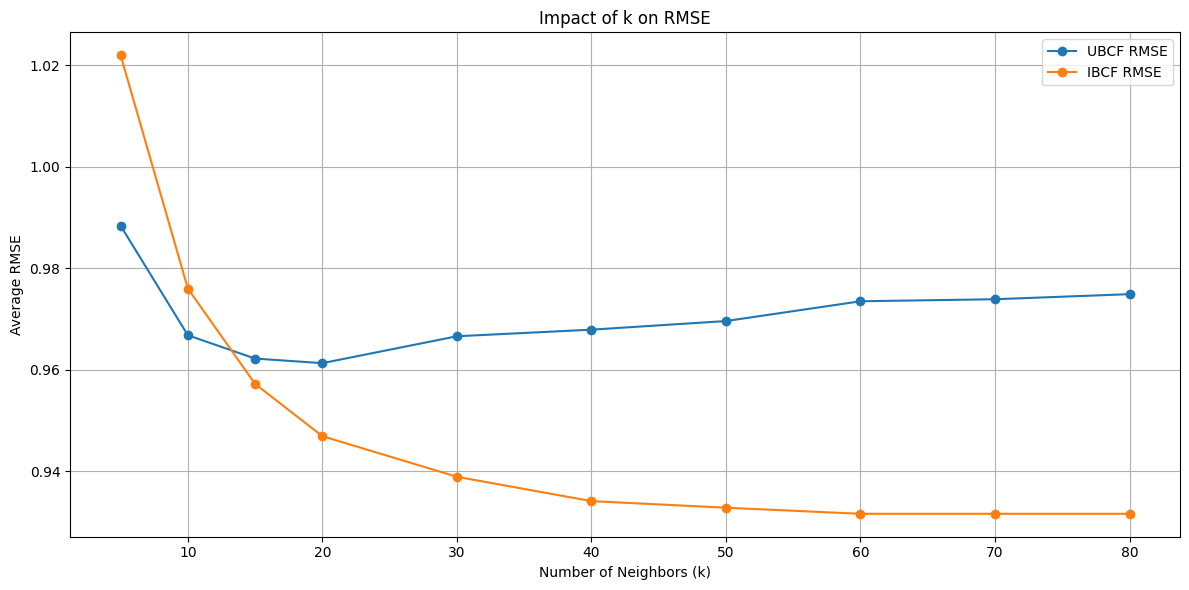

In [32]:
k_values = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80]
ubcf_rmse = [0.9884, 0.9668, 0.9622, 0.9613, 0.9666, 0.9679, 0.9696, 0.9735, 0.9739, 0.9749] # RMSE values for UBCF for different k values
ibcf_rmse = [1.022, 0.976, 0.9572, 0.9469, 0.9389, 0.9341, 0.9328, 0.9316, 0.9316 , 0.9316] # RMSE values for IBCF for different k values

plt.figure(figsize=(12, 6))

plt.plot(k_values, ubcf_rmse, label='UBCF RMSE', marker='o')
plt.plot(k_values, ibcf_rmse, label='IBCF RMSE', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average RMSE')
plt.title('Impact of k on RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Inference:

For UBCF:

Initially, the RMSE values decreases with increase in k. RMSE value reachest its lowest at k = 20. And then, the RMSE value gradually increases with increase in k.

For IBCF:

The RMSE value decreases with increase in k. RMSE value reachest its lowest at k = 60. Eventually, it seems like the RMSE value plateaus and does not change much with increase in k.


**Part g. Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE.  Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering? (10 points)**

In the range that I have chosen for k neighbors which between 5 and 80, I can infer the following:

The best k for UBCF is 20.

The best k for IBCF is 60.

Therefore, as depicted clearly, the best k for UBCF is **not the same** as the best k for IBCF.